# Gradiente_Descendiente


**librerias**


In [138]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd

**Lectura de datos**
 

In [139]:
datoscop=pd.read_csv('https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv')

**Seleccion_de_datos**

In [140]:
X1=datoscop["X"]      # vector de entrada X1
X2=datoscop["W"]      # vector de entrada X2

Y1=datoscop["b"]      # bandera  o vector de salida 

**Clasificacion_de_datos**

In [141]:
n=100                                     # nuemro de datos a clasificar 
learnrate=0.005                           # tasa de aprendizaje 


seleccion_1_1=[]                          # vector que clasifica los datos x1=1                   
seleccion_1_2=[]                          # vector que clasifica los datos x2=1
seleccion_0_1=[]                          # vector que clasifica  los datos x1=0
seleccion_0_2=[]                          # vector que clasifica los datos x2=0



for i in range (n):                       # ciclo necesario para  la clasificacion de los puntos Y1=1 or Y1=0
  if Y1[i]==1:
    seleccion_1_1.append(X1[i])
    seleccion_1_2.append(X2[i])
  else:
    seleccion_0_1.append(X1[i])
    seleccion_0_2.append(X2[i])

**Funcion_Sigmoide**

In [142]:
def sigmoid(x):  
    sig = 1 / (1 + math.exp(-x))                   # función sigmoide
    return sig

**funcion_Error**



In [143]:
def funcion_error(x):
    return sigmoid(x) * (1 - sigmoid(x))           # derivada del sigmoide 

**Funcion_logaritmo_natural**


In [144]:
def ln(x):
    return(math.log(x))                            # logaritmo natural

**Red_Multicapa**

In [145]:
epochs=37                                          # numero de epocas necesarias 


peso1=1
peso2=1
bias=-0.3

Y1_1=np.multiply(Y1,3)                             # nueva bandera 



for epocas in range (epochs):

 for i in range(n):
 
  solucion=(X1[i]*peso1)+(X2[i]*peso2)+bias        # Wx+b                           
  salida=sigmoid(solucion)                         # sigmoide(Wx+b)


  error=salida-Y1[i]               


  new1=learnrate*error*X1[i]
  new2=learnrate*error*X2[i]
  newbias=learnrate*-error


  peso1=peso1-new1
  peso2=peso2-new2
  bias=bias-newbias                                # actalizacion de pesos y bias 


  



print(peso1,peso2,bias)                            # pesos resultantes 
 

-1.30742182429467 -1.4145571828207477 1.4318868893644272


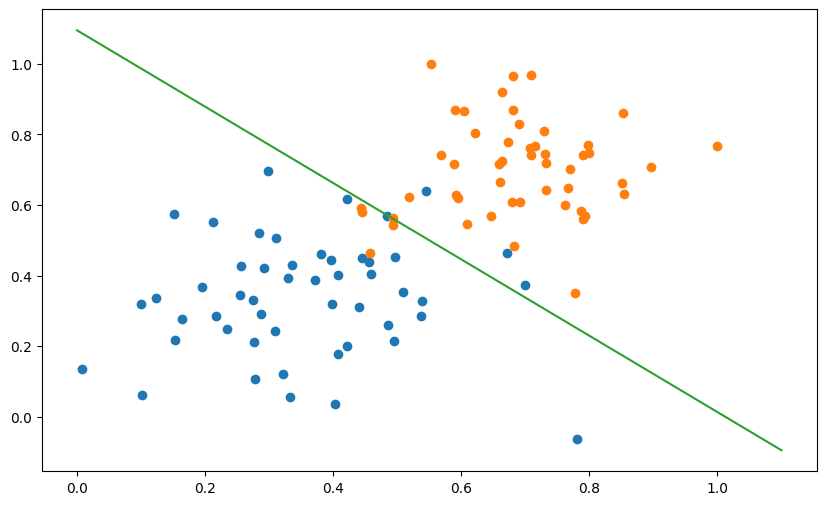

In [146]:
def clasificador(peso1,peso2,bias):
  return (-bias-(peso2*x22))/peso1                  # función graficadora recta clasificadora 


x22=np.arange(0,1.2,0.1)
graph=clasificador(peso1,peso2,bias)


plt.figure(figsize=(10,6))
plt.plot(seleccion_1_1,seleccion_1_2,'o')             
plt.plot(seleccion_0_1,seleccion_0_2,'o') 
plt.plot(x22,graph)

*Error_Estimado*


In [147]:
def estimate(m,peso1,peso2,bias):
    sum_err=0
    for i in range(m):

        solucion=(X1[i]*peso1)+(X2[i]*peso2)+bias


        err=((1-Y1_1[i])*ln(1-sigmoid(solucion)))    +    (Y1_1[i]*ln(sigmoid(solucion)))
        

        sum_err=sum_err+err                                                                      # sumatoria de todos los errores 
    

    return sum_err
        
        





In [148]:
goal_1=-0.01*estimate(100,1,1,-0.3)                # función error inicial
print(goal_1)

goal_2=-0.01*estimate(100,peso1,peso2,bias)        # función error final
print(goal_2)


0.5550442136125316
0.009104835536478452
